In [14]:
import pandas as pd
pd.options.mode.chained_assignment = None
T=pd.read_csv(r'C:\Users\julia\Documents\python36\datasource\data\prix_m2_france.csv')
T.head()

,com,dep,reg,nom,pop,ventes,prix
0,32216,32,76,LOURTIES MONBRUN,152,NaN,NaN
1,47033,47,75,BOUDY DE BEAUREGARD,412,4.0,1421.0
2,32009,32,76,ARMOUS ET CAU,86,NaN,NaN
3,38225,38,84,AUTRANS MEAUDRE EN VERCORS,2969,47.0,2667.0
4,62890,62,32,WILLEMAN,182,3.0,967.0


In [15]:
S=T.query('pop > 2000')

In [16]:
S['prix'].describe()

count     4932.000000
mean      2253.482157
std       1183.037075
min        509.000000
25%       1472.750000
50%       1954.500000
75%       2757.250000
max      11965.000000
Name: prix, dtype: float64

In [17]:
import pylab as pl
pl.style.use('bmh')

import seaborn as sn

<AxesSubplot:xlabel='prix'>

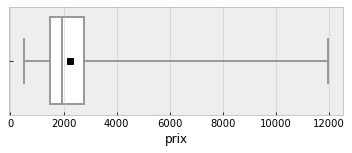

In [18]:
import pylab as pl
pl.figure(figsize=(6,2))
sn.boxplot(x='prix',
           data=S,
           showmeans=True,
           whis=[0,100],
           color='white',
           meanprops={'marker' : 's',
                      'markerfacecolor' : 'black',
                      'markeredgecolor' : 'black'}
          )

In [19]:
S.groupby('reg')['prix'].describe()

,count,mean,std,min,25%,50%,75%,max
reg,,,,,,,,
11,560.0,3781.707143,1726.725415,1494.0,2873.75,3258.0,3943.75,11965.0
24,227.0,1668.590308,445.136883,845.0,1306.00,1629.0,1991.50,2960.0
27,199.0,1492.984925,411.828265,812.0,1166.00,1415.0,1738.50,2608.0
28,273.0,1778.153846,593.009676,509.0,1371.00,1715.0,2054.00,4863.0
32,536.0,1741.710821,585.733068,643.0,1323.75,1629.5,2069.75,5608.0
44,204.0,1469.416667,392.150328,726.0,1171.50,1432.5,1717.50,2695.0
52,406.0,1841.492611,604.721377,845.0,1432.00,1733.0,2103.50,4750.0
53,419.0,1805.004773,589.104604,780.0,1347.00,1717.0,2064.00,4137.0
75,531.0,2050.725047,1029.172388,766.0,1346.50,1694.0,2656.00,7516.0


In [20]:
result=S.groupby('reg')['prix'].describe()
result.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
reg,,,,,,,,
94,14.0,4318.928571,1536.765808,2680.0,3383.25,3807.5,4841.75,8684.0
11,560.0,3781.707143,1726.725415,1494.0,2873.75,3258.0,3943.75,11965.0
93,322.0,3337.400621,1229.774730,1088.0,2533.50,3110.5,3902.25,10309.0
84,726.0,2488.820937,1018.307437,575.0,1742.25,2266.5,3171.25,7784.0
76,515.0,2071.689320,661.566435,676.0,1575.00,1996.0,2469.00,4510.0
75,531.0,2050.725047,1029.172388,766.0,1346.50,1694.0,2656.00,7516.0
52,406.0,1841.492611,604.721377,845.0,1432.00,1733.0,2103.50,4750.0
53,419.0,1805.004773,589.104604,780.0,1347.00,1717.0,2064.00,4137.0
28,273.0,1778.153846,593.009676,509.0,1371.00,1715.0,2054.00,4863.0


<AxesSubplot:xlabel='reg', ylabel='prix'>

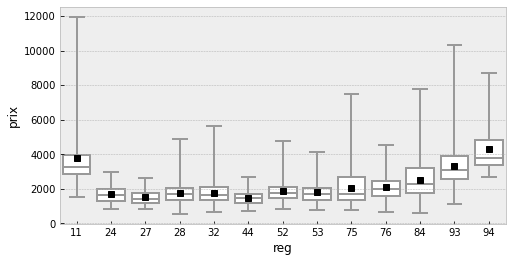

In [21]:
pl.figure(figsize=(8,4))
sn.boxplot(x='reg',
           y='prix',
           data=S,
           showmeans=True,
           whis=[0,100],
           color='white',
           meanprops={'marker':'s',
                      'markerfacecolor':'black',
                      'markeredgecolor':'black'}
          )

In [22]:
V1=S.query('pop < 20000')

In [23]:
V2=S.query('pop >= 20000')

In [24]:
S['grande'] = S['pop'].apply(lambda x : 1 if x >= 20000 else 0)
S

,com,dep,reg,nom,pop,ventes,prix,grande
3,38225,38,84,AUTRANS MEAUDRE EN VERCORS,2969,47.0,2667.0,0
20,31547,31,76,SEYSSES,8787,62.0,2193.0,0
33,33200,33,75,HAILLAN,10886,125.0,3486.0,0
45,12202,12,76,RODEZ,23739,122.0,1684.0,1
51,81220,81,76,RABASTENS,5565,63.0,1846.0,0
...,...,...,...,...,...,...,...,...
34862,59476,59,32,PROVILLE,3165,17.0,1576.0,0
34863,62902,62,32,WIZERNES,3317,33.0,1345.0,0
34871,54261,54,44,HERSERANGE,4368,54.0,1324.0,0
34877,47310,47,75,TONNEINS,9055,127.0,1163.0,0


<AxesSubplot:xlabel='reg', ylabel='prix'>

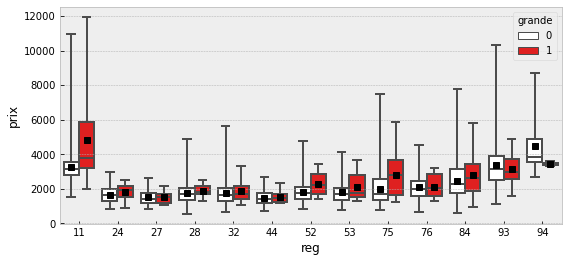

In [25]:
pl.figure(figsize=(9,4))
sn.boxplot(x='reg',
          y='prix',
          data=S,
          hue='grande',
          showmeans=True,
          whis=[0,100],
          palette=['white','red'],
          meanprops={'marker':'s',
                     'markerfacecolor':'black',
                     'markeredgecolor':'black'},
         )